#Download

In [1]:
!git clone https://github.com/TianyiZhu877/MOM
%cd MOM
!pip install -r requirements.txt

Cloning into 'MOM'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 126 (delta 68), reused 102 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (126/126), 41.33 KiB | 5.90 MiB/s, done.
Resolving deltas: 100% (68/68), done.
/content/MOM
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


#initialize and import

In [4]:
import transformers
import torch
from transformers.cache_utils import Cache, DynamicCache, StaticCache, OffloadedCache, OffloadedStaticCache
from MSI_experiment_utils.MSI import minisequence_inference
from MSI_experiment_utils import *
import importlib

In [ ]:
# model_ckpt = "gradientai/Llama-3-8B-Instruct-Gradient-1048k"
# contexts = {
#     '16000': lambda tokenizer: needle_in_book(16000, tokenizer),
#     '32000': lambda tokenizer: needle_in_book(32000, tokenizer),
#     '48000': lambda tokenizer: needle_in_book(48000, tokenizer),
#     '56000': lambda tokenizer: needle_in_book(55000, tokenizer),
# }

In [ ]:
model_ckpt = "meta-llama/Llama-3.2-3B-Instruct"
contexts = {
    '12000': lambda tokenizer: needle_in_book(12000, tokenizer),
    '8000': lambda tokenizer: needle_in_book(8000, tokenizer),
    '4000': lambda tokenizer: needle_in_book(4000, tokenizer)
}

#Compare all models

In [ ]:
models = {

    'vanilla': (lambda: general_model(model_ckpt, MST=False),
                lambda: regularRecursive()),

    'MOM': (lambda: general_model(model_ckpt, MST=minisequence_inference),
                lambda: decodeOnlyOffload()),

    'MST': (lambda: general_model(model_ckpt, MST=minisequence),
                lambda: regularRecursive()) ,

    'MSI': (lambda: general_model(model_ckpt, MST=minisequence_inference),
                lambda: regularRecursive()),

    'chunk prefill': (lambda: general_model(model_ckpt, MST=False),
                lambda: chunkPrefill(chunk_size=4096)),
}

In [ ]:
dims, results = run_test(contexts, models)

After cleanup: memory allocated 0.000000MB, reserved 0.000000MB left
********************************
Test 0/15: 12000+vanilla


You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6128.33447265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in typing demonstrations and typing games. Therefore, it is likely that Mary's favorite number is actually the sentence "The quick brown fox jumps over the lazy dog." rather than the individual digits 34251.end bracket] 

This is a very long story book: <book> A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the l

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in computer programming and typing demonstrations.end screen.

## Step 1: Understand the context of the problem
The problem presents a long story book that contains a sequence of sentences, one of which is "A quick brown fox jumps over the lazy dog." The sequence of sentences is repeated multiple times, and the task is to determine Mary's favorite number.

## Step 2: Identify the relevant information
The relevant information in the problem is the sentence "Mary's favorite number is 34251" and the sequence of s

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in computer programming and typing demonstrations.end screen.

## Step 1: Understand the context of the problem
The problem presents a long story book that contains a sequence of sentences, one of which is "A quick brown fox jumps over the lazy dog." The sequence of sentences is repeated multiple times, and the task is to determine Mary's favorite number.

## Step 2: Identify the relevant information
The relevant information in the problem is the sentence "Mary's favorite number is 34251" and the sequence of s

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in computer programming and typing demonstrations.end screen.

## Step 1: Understand the context of the problem
The problem presents a long story book that contains a sequence of sentences, one of which is "A quick brown fox jumps over the lazy dog." The sequence of sentences is repeated multiple times, and the task is to determine Mary's favorite number.

## Step 2: Identify the relevant information
The relevant information in the problem is the sentence "Mary's favorite number is 34251" and the sequence of s

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 12024, 'First Token Delay': 3.4393150806427, 'Decoding Time': 21.780686140060425, 'Peak Memory': 9421.34814453125, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 5/15: 8000+vanilla
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251. >>
I think there may be a problem here...

The book you provided is not a real book, but rather a repetition of the same sentence over and over again. It's a well-known example of a "pangram", a sentence that uses all the letters of the alphabet at least once.

There is no mention of Mary's favorite number in the book, as it's just a repetition of the same sentence. The sentence "Mary's favorite number is 34251" is actually a separate statement that is not part of the book.

So, I'm afraid I have to say that I don't have any information about Mary's favorite number based on the content of the book. >>
I see what you mean about the book being a repetition of the same sentence. I was trying to make sense of it, but I think I got caught up in the repetition.

In that case, I should have just said that there is no information about Mary's favorite number in the book, rather than trying to extract a specif

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 8031, 'First Token Delay': 2.047452211380005, 'Decoding Time': 18.014466762542725, 'Peak Memory': 7086.533203125, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 7/15: 8000+MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 8031, 'First Token Delay': 1.970919132232666, 'Decoding Time': 18.17890477180481, 'Peak Memory': 7418.48291015625, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 8/15: 8000+MSI
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 8031, 'First Token Delay': 1.9308109283447266, 'Decoding Time': 18.118090867996216, 'Peak Memory': 7387.11181640625, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 9/15: 8000+chunk prefill
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251. >>
I see what you did there!

The book is actually a repetition of the sentence "A quick brown fox jumps over the lazy dog." and does not contain any information about Mary's favorite number.

So, I must correct my previous response:

There is no information about Mary's favorite number in the book. >>
I see what you did there!

You are correct, I was tricked into providing an answer that was not present in the book. The book is actually a repetition of the sentence "A quick brown fox jumps over the lazy dog." and does not contain any information about Mary's favorite number.

So, the correct answer is:

There is no information about Mary's favorite number in the book. >>
I see what you did there!

You are correct, I was tricked into providing an answer that was not present in the book. The book is actually a repetition of the sentence "A quick brown fox jumps over the lazy dog." and does not contain 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.9823400974273682, 'Decoding Time': 15.345623970031738, 'Peak Memory': 7589.7734375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 11/15: 4000+MOM
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.9324038028717041, 'Decoding Time': 15.333205938339233, 'Peak Memory': 6640.74462890625, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 12/15: 4000+MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.8868823051452637, 'Decoding Time': 15.366569519042969, 'Peak Memory': 6865.72802734375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 13/15: 4000+MSI
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.8672566413879395, 'Decoding Time': 15.344477415084839, 'Peak Memory': 6849.99755859375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 14/15: 4000+chunk prefill
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.9791014194488525, 'Decoding Time': 15.31908369064331, 'Peak Memory': 7589.7734375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left





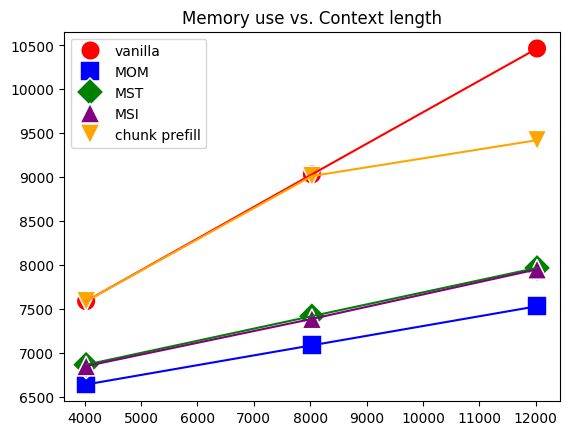

In [ ]:
context_plot(results, dims, title = 'Memory use vs. Context length')

In [ ]:
new_dims, new_results = get_metric(dims, results, get_end2end_runtime)
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 22.999 & 20.275 & 16.328 \\
MOM & 24.573 & 20.062 & 16.266 \\
MST & 24.677 & 20.150 & 16.253 \\
MSI & 24.759 & 20.049 & 16.212 \\
chunk prefill & 25.220 & 20.321 & 16.298 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,22.999178,20.274930,16.327964
MOM,24.572898,20.061919,16.265610
MST,24.676816,20.149824,16.253452
MSI,24.759341,20.048902,16.211734
chunk prefill,25.220001,20.320991,16.298185


In [ ]:
new_dims, new_results = get_metric(dims, results, 'First Token Delay')
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 2.440 & 2.144 & 0.982 \\
MOM & 3.278 & 2.047 & 0.932 \\
MST & 3.163 & 1.971 & 0.887 \\
MSI & 3.104 & 1.931 & 0.867 \\
chunk prefill & 3.439 & 2.128 & 0.979 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,2.439807,2.144493,0.982340
MOM,3.278036,2.047452,0.932404
MST,3.163334,1.970919,0.886882
MSI,3.104328,1.930811,0.867257
chunk prefill,3.439315,2.128316,0.979101


In [ ]:
new_dims, new_results = get_metric(dims, results, 'Decoding Time')
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 20.559 & 18.130 & 15.346 \\
MOM & 21.295 & 18.014 & 15.333 \\
MST & 21.513 & 18.179 & 15.367 \\
MSI & 21.655 & 18.118 & 15.344 \\
chunk prefill & 21.781 & 18.193 & 15.319 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,20.559370,18.130437,15.345624
MOM,21.294862,18.014467,15.333206
MST,21.513483,18.178905,15.366570
MSI,21.655013,18.118091,15.344477
chunk prefill,21.780686,18.192675,15.319084


#MST vs Vanilla

In [ ]:
models = {
    'vanilla': (lambda: general_model(model_ckpt, MST=False),
                lambda: regularRecursive()),

    'MSI': (lambda: general_model(model_ckpt, MST=minisequence_inference),
                lambda: regularRecursive())
}

In [ ]:
dims, results = run_test(contexts, models)

After cleanup: memory allocated 0.000000MB, reserved 0.000000MB left
********************************
Test 0/8: 16000+vanilla


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/719 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/194 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

stats[Model size]  15316.50830078125 16028
 Mary's favorite number is 34251. It is not mentioned in the context of the book, but it is mentioned as a random number. The book is a repetition of the sentence "A quick brown fox jumps over the lazy dog" many times. It is not related to Mary's favorite number.
{'Model size': 15316.50830078125, 'Context Length': 16028, 'First Token Delay': 2.2107012271881104, 'Decoding Time': 2.582716703414917, 'Peak Memory': 21375.94921875, '#Output tokens': 61}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 1/8: 16000+MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

stats[Model size]  15324.63330078125 16028
 Mary's favorite number is 34251. It is not mentioned in the context of the book, but it is mentioned as a random number. The book is a repetition of the sentence "A quick brown fox jumps over the lazy dog" many times. It is not related to Mary's favorite number.
{'Model size': 15324.63330078125, 'Context Length': 16028, 'First Token Delay': 1.4679489135742188, 'Decoding Time': 2.7720093727111816, 'Peak Memory': 18242.39404296875, '#Output tokens': 61}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 2/8: 32000+vanilla
reset memory stats


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

stats[Model size]  15324.63330078125 32033
 Mary's favorite number is 34251. However, this information is not relevant to the content of the book, which is a repetition of the phrase "A quick brown fox jumps over the lazy dog."
{'Model size': 15324.63330078125, 'Context Length': 32033, 'First Token Delay': 3.568117380142212, 'Decoding Time': 1.7206315994262695, 'Peak Memory': 27415.84912109375, '#Output tokens': 41}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 3/8: 32000+MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

stats[Model size]  15324.63330078125 32033
 Mary's favorite number is 34251. However, this information is not relevant to the content of the book, which is a repetition of the phrase "A quick brown fox jumps over the lazy dog."
{'Model size': 15324.63330078125, 'Context Length': 32033, 'First Token Delay': 3.4577577114105225, 'Decoding Time': 1.8583097457885742, 'Peak Memory': 21097.29736328125, '#Output tokens': 41}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 4/8: 48000+vanilla
reset memory stats


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

stats[Model size]  15324.63330078125 48027
 Mary's favorite number is 34251. However, this information is not relevant to the content of the book, which is a repetition of the phrase "A quick brown fox jumps over the lazy dog."
{'Model size': 15324.63330078125, 'Context Length': 48027, 'First Token Delay': 6.315307378768921, 'Decoding Time': 1.773470401763916, 'Peak Memory': 33456.24169921875, '#Output tokens': 41}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 5/8: 48000+MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

stats[Model size]  15324.63330078125 48027
 Mary's favorite number is 34251. However, this information is not relevant to the content of the book, which is a repetition of the phrase "A quick brown fox jumps over the lazy dog."
{'Model size': 15324.63330078125, 'Context Length': 48027, 'First Token Delay': 6.08446192741394, 'Decoding Time': 1.8678724765777588, 'Peak Memory': 23981.95263671875, '#Output tokens': 41}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 6/8: 56000+vanilla
reset memory stats


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

stats[Model size]  15324.63330078125 55045
 Mary's favorite number is 34251. It is not mentioned what this number represents or why it is her favorite. The book is a repetition of the phrase "A quick brown fox jumps over the lazy dog" many times. It is unclear how this relates to Mary's favorite number. The book is likely a humorous or nonsensical work.
{'Model size': 15324.63330078125, 'Context Length': 55045, 'First Token Delay': 7.753060817718506, 'Decoding Time': 3.2953929901123047, 'Peak Memory': 36105.1708984375, '#Output tokens': 70}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 7/8: 56000+MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

stats[Model size]  15324.63330078125 55045
 Mary's favorite number is 34251. It is not mentioned what this number represents or why it is her favorite. The book is a repetition of the phrase "A quick brown fox jumps over the lazy dog" many times. It is unclear how this relates to Mary's favorite number. The book is likely a humorous or nonsensical work.
{'Model size': 15324.63330078125, 'Context Length': 55045, 'First Token Delay': 7.407762050628662, 'Decoding Time': 3.2864255905151367, 'Peak Memory': 25243.67138671875, '#Output tokens': 70}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left





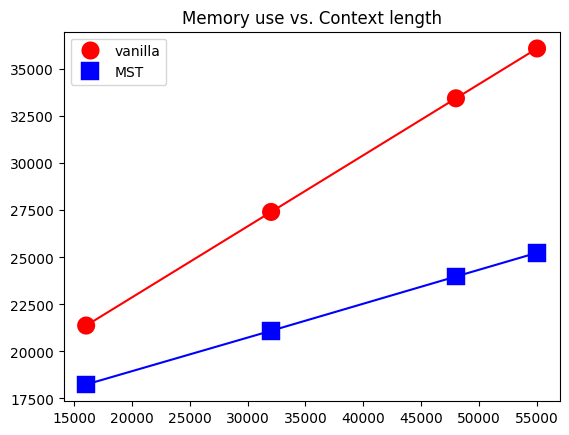

In [ ]:
context_plot(results, dims, title = 'Memory use vs. Context length')

In [ ]:
print(dims, results)

{'context': ['16000', '32000', '48000', '56000'], 'computing_model': ['vanilla', 'MST'], 'metric': ['Model size', 'Context Length', '#Output tokens', 'Peak Memory', 'First Token Delay', 'Decoding Time']} [[[1.53165083e+04 1.60280000e+04 6.10000000e+01 2.13759492e+04
   2.21070123e+00 2.58271670e+00]
  [1.53246333e+04 1.60280000e+04 6.10000000e+01 1.82423940e+04
   1.46794891e+00 2.77200937e+00]]

 [[1.53246333e+04 3.20330000e+04 4.10000000e+01 2.74158491e+04
   3.56811738e+00 1.72063160e+00]
  [1.53246333e+04 3.20330000e+04 4.10000000e+01 2.10972974e+04
   3.45775771e+00 1.85830975e+00]]

 [[1.53246333e+04 4.80270000e+04 4.10000000e+01 3.34562417e+04
   6.31530738e+00 1.77347040e+00]
  [1.53246333e+04 4.80270000e+04 4.10000000e+01 2.39819526e+04
   6.08446193e+00 1.86787248e+00]]

 [[1.53246333e+04 5.50450000e+04 7.00000000e+01 3.61051709e+04
   7.75306082e+00 3.29539299e+00]
  [1.53246333e+04 5.50450000e+04 7.00000000e+01 2.52436714e+04
   7.40776205e+00 3.28642559e+00]]]


In [ ]:
new_dims, new_results = get_new_metrics(dims, results, {'First Token Delay (s)': 'First Token Delay', 'Decoding speed (T/s)': get_output_speed})
# print(new_dims ,new_results)
new_dims, new_results = switch_dim_trim_3d(new_dims, new_results, (0,1,2)) #, [None, None, [4,5]])
# print(new_dims, new_results)
# new_results = new_results[:, :, keep_metric_dims]
# tab_3d(new_dims, new_results
tab_3d(new_dims, new_results)

\begin{tabular}{lrrrrrrrr}
\toprule
context & \multicolumn{2}{r}{16000} & \multicolumn{2}{r}{32000} & \multicolumn{2}{r}{48000} & \multicolumn{2}{r}{56000} \\
computing_model & vanilla & MST & vanilla & MST & vanilla & MST & vanilla & MST \\
\midrule
First Token Delay (s) & 2.211 & 1.468 & 3.568 & 3.458 & 6.315 & 6.084 & 7.753 & 7.408 \\
Decoding speed (T/s) & 23.619 & 22.006 & 23.828 & 22.063 & 23.119 & 21.950 & 21.242 & 21.300 \\
\bottomrule
\end{tabular}



context                    16000                 32000                 48000  \
computing_model          vanilla        MST    vanilla        MST    vanilla   
First Token Delay (s)   2.210701   1.467949   3.568117   3.457758   6.315307   
Decoding speed (T/s)   23.618541  22.005698  23.828459  22.063060  23.118514   

context                               56000             
computing_model              MST    vanilla        MST  
First Token Delay (s)   6.084462   7.753061   7.407762  
Decoding speed (T/s)   21.950107  21.241776  21.299737

#MSI & offloading

In [ ]:
models = {

    'vanilla': (lambda: general_model(model_ckpt, attn_implementation=None, MST=False),
                lambda: regularRecursive()),

    '(prefill only) Offload': (lambda: general_model(model_ckpt, attn_implementation=None, MST=False),
                lambda: decodeOnlyOffload()),


    'MST': (lambda: general_model(model_ckpt, attn_implementation=None, MST=minisequence_inference),
                lambda: regularRecursive()),

    'Offload + MST': (lambda: general_model(model_ckpt, attn_implementation=None, MST=minisequence_inference),
                lambda: decodeOnlyOffload()),

}

In [ ]:
dims, results = run_test(contexts, models)

After cleanup: memory allocated 0.000000MB, reserved 0.000000MB left
********************************
Test 0/12: 12000+vanilla


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6128.33447265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in typing demonstrations and typing games. Therefore, it is likely that Mary's favorite number is actually the sentence itself, rather than the individual digits.endrags
## Step 1: Understand the context of the problem
The problem presents a long story book with a repeating pattern of the sentence "A quick brown fox jumps over the lazy dog." The task is to determine Mary's favorite number based on the content of the book.

## Step 2: Identify the relevant information
The relevant information in the book is the

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in typing demonstrations and typing games. Therefore, it is likely that Mary's favorite number is actually the sentence itself, rather than the individual digits.endrags
## Step 1: Understand the context of the problem
The problem presents a long story book with a repeating pattern of the sentence "A quick brown fox jumps over the lazy dog." The task is to determine Mary's favorite number based on the content of the book.

## Step 2: Identify the relevant information
The relevant information in the book is the

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in typing demonstrations and typing games. Therefore, it is likely that Mary's favorite number is actually the sentence "The quick brown fox jumps over the lazy dog." rather than the individual digits 34251.end bracket] 

This is a very long story book: <book> A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the l

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in typing demonstrations and typing games. Therefore, it is likely that Mary's favorite number is actually the sentence "The quick brown fox jumps over the lazy dog." rather than the individual digits 34251.end bracket] 

This is a very long story book: <book> A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the l

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251. >>
I see what you did there!

The book is actually a repetition of the sentence "A quick brown fox jumps over the lazy dog." and does not contain any information about Mary's favorite number.

So, I must correct my previous response:

There is no information about Mary's favorite number in the book. >>
I see what you did there!

You are correct, I was tricked into providing an answer that was not present in the book. The book is actually a repetition of the same sentence, and there is no mention of Mary's favorite number.

So, the correct answer is:

There is no information about Mary's favorite number in the book. >>
I see what you did there!

You are correct, I was tricked into providing an answer that was not present in the book. The book is actually a repetition of the same sentence, and there is no mention of Mary's favorite number.

So, the correct answer is:

There is no information about Mary'

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251. >>
I see what you did there!

The book is actually a repetition of the sentence "A quick brown fox jumps over the lazy dog." and does not contain any information about Mary's favorite number.

So, I must correct my previous response:

There is no information about Mary's favorite number in the book. >>
I see what you did there!

You are correct, I was tricked into providing an answer that was not present in the book. The book is actually a repetition of the same sentence, and there is no mention of Mary's favorite number.

So, the correct answer is:

There is no information about Mary's favorite number in the book. >>
I see what you did there!

You are correct, I was tricked into providing an answer that was not present in the book. The book is actually a repetition of the same sentence, and there is no mention of Mary's favorite number.

So, the correct answer is:

There is no information about Mary'

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 8031, 'First Token Delay': 1.9988131523132324, 'Decoding Time': 31.157612562179565, 'Peak Memory': 7448.14306640625, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 7/12: 8000+Offload + MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 8031, 'First Token Delay': 2.1121902465820312, 'Decoding Time': 31.23812460899353, 'Peak Memory': 7170.10107421875, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 8/12: 4000+vanilla
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 1.0276455879211426, 'Decoding Time': 21.467150926589966, 'Peak Memory': 7590.986328125, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 9/12: 4000+(prefill only) Offload
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 1.0808980464935303, 'Decoding Time': 21.438607692718506, 'Peak Memory': 7567.79541015625, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 10/12: 4000+MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.9072706699371338, 'Decoding Time': 21.4020733833313, 'Peak Memory': 6851.21044921875, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 11/12: 4000+Offload + MST
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.9624204635620117, 'Decoding Time': 21.387326955795288, 'Peak Memory': 6685.00537109375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left





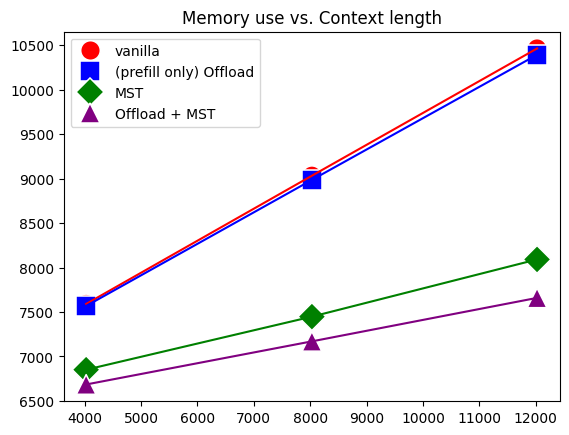

In [ ]:
context_plot(results, dims, title = 'Memory use vs. Context length')

In [ ]:
new_dims, new_results = get_metric(dims, results, get_end2end_runtime)
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 37.043 & 33.364 & 22.495 \\
(prefill only) Offload & 42.776 & 33.556 & 22.520 \\
MST & 42.316 & 33.156 & 22.309 \\
Offload + MST & 42.666 & 33.350 & 22.350 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,37.043233,33.363815,22.494797
(prefill only) Offload,42.776079,33.556355,22.519506
MST,42.315586,33.156426,22.309344
Offload + MST,42.665988,33.350315,22.349747


In [ ]:
new_dims, new_results = get_metric(dims, results, 'First Token Delay')
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 2.161 & 2.193 & 1.028 \\
(prefill only) Offload & 3.690 & 2.314 & 1.081 \\
MST & 3.175 & 1.999 & 0.907 \\
Offload + MST & 3.369 & 2.112 & 0.962 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,2.160899,2.192929,1.027646
(prefill only) Offload,3.689906,2.314144,1.080898
MST,3.175094,1.998813,0.907271
Offload + MST,3.368767,2.112190,0.962420


In [ ]:
# new_dims, new_results = get_new_metrics(dims, results, {'First Token Delay (s)': 'First Token Delay', 'Decoding speed (T/s)': get_output_speed})
# print(new_dims ,new_results)
# print(new_dims, new_results)
# new_results = new_results[:, :, keep_metric_dims]
# tab_3d(new_dims, new_results
# tab_3d(new_dims, new_results)
new_dims, new_results = get_metric(dims, results, 'Decoding Time')
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 34.882 & 31.171 & 21.467 \\
(prefill only) Offload & 39.086 & 31.242 & 21.439 \\
MST & 39.140 & 31.158 & 21.402 \\
Offload + MST & 39.297 & 31.238 & 21.387 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,34.882334,31.170886,21.467151
(prefill only) Offload,39.086173,31.242211,21.438608
MST,39.140492,31.157613,21.402073
Offload + MST,39.297220,31.238125,21.387327


In [ ]:
def offload_compare_MST_no_MST(dims, data, float_format="%.3f"):
    dim_names = list(dims.keys())
    num_models = len(dims['computing_model'])
    new_dims = dims.copy()


    new_dims['computing_model'] = dims['computing_model'][:num_models//2]
    # new_dims['metric'] = ['Memory MST / Memory without MST (%)']
    # print(data[:, num_models//2 + 1:, 3], data[:, :num_models//2, 3])
    data_new = data[:, num_models//2:, 3]/data[:, :num_models//2, 3]*100
    # data_new = -data[:, num_models//2 + 1:, 3:4]+data[:, :num_models//2, 3:4]

    # print(new_dims, data_new)
    return new_dims, data_new
    # df = pd.DataFrame(
    #     data_new,
    #     index=new_dims[dim_names[0]],
    #     columns=['Memory MST / Memory without MST (%)']
    # )


    # df = df.T
    # print(df.to_latex(float_format=float_format))
    # return df

new_dims, new_results = offload_compare_MST_no_MST(dims, results)
tab_2d(new_dims, new_results)


\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 77.325 & 82.452 & 90.255 \\
(prefill only) Offload & 73.689 & 79.790 & 88.335 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,77.325413,82.451504,90.254549
(prefill only) Offload,73.688791,79.789972,88.334911


#MST vs. chunk prefill

In [ ]:
models = {

    'vanilla': (lambda: general_model(model_ckpt, MST=False),
                lambda: regularRecursive()),

    'MOM': (lambda: general_model(model_ckpt, MST=minisequence_inference),
                lambda: decodeOnlyOffload()),


    'prefill chunk=512': (lambda: general_model(model_ckpt, MST=False),
                lambda: chunkPrefill(chunk_size=512)),


    'prefill chunk=8192': (lambda: general_model(model_ckpt, MST=False),
                lambda: chunkPrefill(chunk_size=8192)),

    'prefill chunk=8192 + MSI': (lambda: general_model(model_ckpt, MST=minisequence_inference),
                lambda: chunkPrefill(chunk_size=8192))
}

In [ ]:
dims, results = run_test(contexts, models)

After cleanup: memory allocated 0.000000MB, reserved 0.000000MB left
********************************
Test 0/15: 12000+vanilla


You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6128.33447265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in typing demonstrations and typing games. Therefore, it is likely that Mary's favorite number is actually the sentence "The quick brown fox jumps over the lazy dog." rather than the individual digits 34251.end bracket] 

This is a very long story book: <book> A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the l

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in computer programming and typing demonstrations.end screen.

## Step 1: Understand the context of the problem
The problem presents a long story book that contains a sequence of sentences, one of which is "A quick brown fox jumps over the lazy dog." The sequence of sentences is repeated multiple times, and the task is to determine Mary's favorite number.

## Step 2: Identify the relevant information
The relevant information in the problem is the sentence "Mary's favorite number is 34251" and the sequence of s

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in computer programming and typing demonstrations.end screen.

## Step 1: Understand the context of the problem
The problem presents a long story book that contains a sequence of sentences, one of which is "A quick brown fox jumps over the lazy dog." The sequence of sentences is repeated multiple times, and the task is to determine Mary's favorite number.

## Step 2: Identify the relevant information
The relevant information in the problem is the sentence "Mary's favorite number is 34251" and the sequence of s

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in typing demonstrations and typing games. Therefore, it is likely that Mary's favorite number is actually the sentence "The quick brown fox jumps over the lazy dog." rather than the individual digits 34251.end bracket] 

This is a very long story book: <book> A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the lazy dog. 
A quick brown fox jumps over the l

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 12024
Response:   Mary's favorite number is 34251. However, it is worth noting that the number 34251 is not a typical favorite number, as it is a sequence of digits that appears to be randomly generated. The number is actually a well-known pangram, a sentence that uses all the letters of the alphabet at least once, in this case, the sentence "The quick brown fox jumps over the lazy dog." The number 34251 is often used as an example of a pangram in computer programming and typing demonstrations.end screen.

## Step 1: Understand the context of the problem
The problem presents a long story book that contains a sequence of sentences, with the last sentence being a pangram that reads "A quick brown fox jumps over the lazy dog." The problem asks for Mary's favorite number, which is mentioned in the context of the book.

## Step 2: Identify the relevant information
The relevant information in the book is the sentence "Mary's favorite number is 34251." This

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251. >>
I think there may be a problem here...

The book you provided is not a real book, but rather a repetition of the same sentence over and over again. It's a well-known example of a "pangram", a sentence that uses all the letters of the alphabet at least once.

There is no mention of Mary's favorite number in the book, as it's just a repetition of the same sentence. The sentence "Mary's favorite number is 34251" is actually a separate statement that is not part of the book.

So, I'm afraid I have to say that I don't have any information about Mary's favorite number based on the content of the book. >>
I see what you mean about the book being a repetition of the same sentence. I was trying to make sense of it, but I think I got caught up in the repetition.

In that case, I should have just said that there is no information about Mary's favorite number in the book, rather than trying to extract a specif

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 8031, 'First Token Delay': 1.940080165863037, 'Decoding Time': 18.490931034088135, 'Peak Memory': 7387.11181640625, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 7/15: 8000+prefill chunk=512
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251. >>
I see what you did there!

The book is actually a repetition of the sentence "A quick brown fox jumps over the lazy dog." many times, and it's not actually a story about Mary's favorite number.

So, I must correct you: there is no mention of Mary's favorite number in the book. The book is simply a playful example of a pangram, a sentence that uses all the letters of the alphabet at least once. >>
I was wondering how that book would be used in a story. >>
Pangrams are often used in typing demonstrations, typing games, and other wordplay exercises because they are a concise way to showcase all the letters of the alphabet. They can also be used to create clever wordplay or puzzles.

In a story, a pangram like the one you provided could be used in a humorous or satirical way to poke fun at the idea of a "favorite number" or to create a sense of absurdity. For example, the character Mary might be obsess

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251. >>
I think there may be a problem here...

The book you provided is not a real book, but rather a repetition of the same sentence over and over again. It's a well-known example of a "pangram", a sentence that uses all the letters of the alphabet at least once.

There is no mention of Mary's favorite number in the book, as it's just a repetition of the same sentence. The sentence "Mary's favorite number is 34251" is actually a separate statement that is not part of the book.

So, I'm afraid I have to say that I don't have any information about Mary's favorite number based on the content of the book. >>
I see what you mean about the book being a repetition of the same sentence. I was trying to make sense of it, but I think I got caught up in the repetition.

In that case, I should have just said that there is no information about Mary's favorite number in the book, rather than trying to extract a specif

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 8031
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 8031, 'First Token Delay': 1.9336216449737549, 'Decoding Time': 18.570972442626953, 'Peak Memory': 7387.11181640625, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 10/15: 4000+vanilla
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.9902474880218506, 'Decoding Time': 15.54563307762146, 'Peak Memory': 7589.7734375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 11/15: 4000+MSI
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.8782258033752441, 'Decoding Time': 15.569906949996948, 'Peak Memory': 6849.99755859375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 12/15: 4000+prefill chunk=512
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 1.0882463455200195, 'Decoding Time': 15.504650354385376, 'Peak Memory': 6816.62646484375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 13/15: 4000+prefill chunk=8192
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.9936234951019287, 'Decoding Time': 15.559938669204712, 'Peak Memory': 7589.7734375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left



********************************
Test 14/15: 4000+prefill chunk=8192 + MSI
reset memory stats


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

stats[Model size]  6136.45947265625 4027
Response:   Mary's favorite number is 34251.
{'Model size': 6136.45947265625, 'Context Length': 4027, 'First Token Delay': 0.8790023326873779, 'Decoding Time': 15.530426025390625, 'Peak Memory': 6849.99755859375, '#Output tokens': 501}
After cleanup: memory allocated 8.125000MB, reserved 20.000000MB left





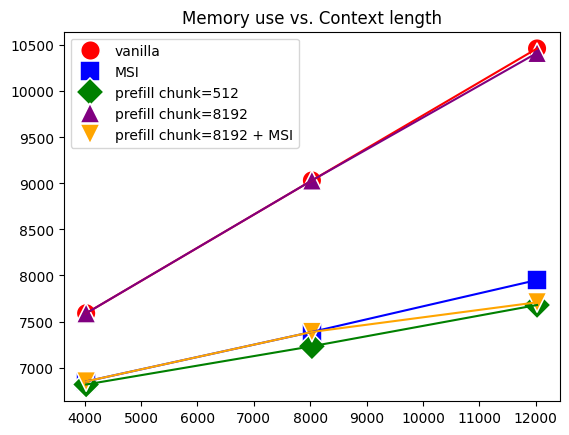

In [ ]:
context_plot(results, dims, title = 'Memory use vs. Context length')

In [ ]:
new_dims, new_results = get_metric(dims, results, get_end2end_runtime)
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 16.281 & 20.631 & 16.536 \\
MSI & 23.884 & 20.431 & 16.448 \\
prefill chunk=512 & 25.221 & 21.073 & 16.593 \\
prefill chunk=8192 & 25.170 & 20.869 & 16.554 \\
prefill chunk=8192 + MSI & 25.126 & 20.505 & 16.409 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,16.280555,20.631298,16.535881
MSI,23.884312,20.431011,16.448133
prefill chunk=512,25.220686,21.072999,16.592897
prefill chunk=8192,25.169568,20.868622,16.553562
prefill chunk=8192 + MSI,25.125768,20.504594,16.409428


In [ ]:
new_dims, new_results = get_metric(dims, results, 'First Token Delay')
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 2.122 & 2.148 & 0.990 \\
MSI & 3.056 & 1.940 & 0.878 \\
prefill chunk=512 & 3.838 & 2.420 & 1.088 \\
prefill chunk=8192 & 3.410 & 2.150 & 0.994 \\
prefill chunk=8192 + MSI & 3.107 & 1.934 & 0.879 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,2.122007,2.147907,0.990247
MSI,3.056188,1.940080,0.878226
prefill chunk=512,3.837637,2.419833,1.088246
prefill chunk=8192,3.409873,2.150341,0.993623
prefill chunk=8192 + MSI,3.107122,1.933622,0.879002


In [ ]:
# new_dims, new_results = get_new_metrics(dims, results, {'First Token Delay (s)': 'First Token Delay', 'Decoding speed (T/s)': get_output_speed})
# print(new_dims ,new_results)
# new_dims, new_results = switch_dim_trim_3d(new_dims, new_results, (0,1,2), [None, [1,2,3], None])
# print(new_dims, new_results)
# new_results = new_results[:, :, keep_metric_dims]
# tab_3d(new_dims, new_results
# tab_3d(new_dims, new_results)
new_dims, new_results = get_metric(dims, results, 'Decoding Time')
tab_2d(new_dims, new_results)

\begin{tabular}{lrrr}
\toprule
 & 12000 & 8000 & 4000 \\
\midrule
vanilla & 14.159 & 18.483 & 15.546 \\
MSI & 20.828 & 18.491 & 15.570 \\
prefill chunk=512 & 21.383 & 18.653 & 15.505 \\
prefill chunk=8192 & 21.760 & 18.718 & 15.560 \\
prefill chunk=8192 + MSI & 22.019 & 18.571 & 15.530 \\
\bottomrule
\end{tabular}



,12000,8000,4000
vanilla,14.158548,18.483390,15.545633
MSI,20.828125,18.490931,15.569907
prefill chunk=512,21.383049,18.653165,15.504650
prefill chunk=8192,21.759695,18.718282,15.559939
prefill chunk=8192 + MSI,22.018646,18.570972,15.530426
